# Victorian Real Estate Dataset

--> This project aims to conduct an in-depth analysis of Victorian real estate data with the objective of estimating the selling price of properties. 

--> Given the nature of predicting a continuous value, specifically the property prices, this task is framed as a regression problem. To achieve this, I have employed the RandomForest regression algorithm for predictive modeling.

## 1. Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read the dataset

In [2]:
df=pd.read_csv("_sold.csv")
df.head()

,latitude,longitude,streetAddress,suburb,postcode,region,bedrooms,bathrooms,parkingSpaces,propertyType,price,listingId,title,dateSold,modifiedDate
0,-38.276067,144.485488,6 Corymbia Circuit,Barwon Heads,3227,bellarine_peninsula,3,2,2,house,"$1,255,000",129714950,Luxurious Coastal Lifestyle Awaits,2018-11-06,2018-11-06T02:00:19Z
1,-38.238159,144.545576,9 La Bella Street,Ocean Grove,3226,bellarine_peninsula,4,2,2,house,"$725,000",129219294,Laid Back Family Living In An Idyllic Location,2018-11-06,2018-11-06T04:01:41Z
2,-37.638387,144.922701,26 Greensted Grove,Roxburgh Park,3064,melbourne___northern_region,4,2,2,house,"$670,000",129517974,Oversized & park-facing,2018-11-06,2018-11-06T02:37:57Z
3,-38.121844,144.332476,80 Calvert Street,Hamlyn Heights,3215,NaN,3,2,1,house,"$600,000",129640018,Cherished Family Home In Leafy Hamlyn Heights,2018-11-06,2018-11-06T02:00:19Z
4,-38.129071,144.323640,295 Church Street,Herne Hill,3218,bellarine_peninsula,3,1,2,house,"$520,000",129459426,Potential Plus,2018-11-06,2018-11-06T02:00:17Z


# 3.Exploratory Data Analysis (EDA)

In [3]:
#Check the shape of dataframe
df.shape

(105120, 15)

In [4]:
#List the columns
df.columns

Index(['latitude', 'longitude', 'streetAddress', 'suburb', 'postcode',
       'region', 'bedrooms', 'bathrooms', 'parkingSpaces', 'propertyType',
       'price', 'listingId', 'title', 'dateSold', 'modifiedDate'],
      dtype='object')

In [5]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   latitude       105119 non-null  float64
 1   longitude      105119 non-null  float64
 2   streetAddress  105120 non-null  object 
 3   suburb         105120 non-null  object 
 4   postcode       105120 non-null  int64  
 5   region         99878 non-null   object 
 6   bedrooms       105120 non-null  int64  
 7   bathrooms      105120 non-null  int64  
 8   parkingSpaces  105120 non-null  int64  
 9   propertyType   105120 non-null  object 
 10  price          105120 non-null  object 
 11  listingId      105120 non-null  int64  
 12  title          105120 non-null  object 
 13  dateSold       105120 non-null  object 
 14  modifiedDate   105120 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 12.0+ MB


In [6]:
#Statistical Description
df.describe()

,latitude,longitude,postcode,bedrooms,bathrooms,parkingSpaces,listingId
count,105119.000000,105119.000000,105120.000000,105120.00000,105120.000000,105120.000000,1.051200e+05
mean,-37.588618,144.986669,3375.773735,2.65429,1.550875,1.553073,1.293164e+08
std,0.612449,0.884748,289.116018,0.79562,0.499316,0.510247,1.023279e+06
min,-38.661799,141.579392,3000.000000,0.00000,0.000000,0.000000,7.418066e+06
25%,-37.998847,144.339984,3101.000000,2.00000,1.000000,1.000000,1.293070e+08
50%,-37.780162,144.962296,3337.000000,3.00000,2.000000,2.000000,1.294218e+08
75%,-37.581211,145.347311,3629.000000,3.00000,2.000000,2.000000,1.294887e+08
max,-36.125909,147.236576,3981.000000,13.00000,5.000000,14.000000,2.022433e+08


In [7]:
#Convert the price object from string to float

def convert(price):
    n_price=price.replace('$','').replace(',','').replace('Contact agent','0')
    n_price=float(n_price)
    return n_price

In [8]:
df['price'] = df['price'].apply(convert)

In [9]:
#Change the zero price value with the mean of prices
df['price'].replace(0,df['price'].mean())

0         1255000.0
1          725000.0
2          670000.0
3          600000.0
4          520000.0
            ...    
105115     356000.0
105116     355000.0
105117     345000.0
105118     340000.0
105119     330000.0
Name: price, Length: 105120, dtype: float64

In [10]:
df.describe()  #Price column has been added

,latitude,longitude,postcode,bedrooms,bathrooms,parkingSpaces,price,listingId
count,105119.000000,105119.000000,105120.000000,105120.00000,105120.000000,105120.000000,1.051200e+05,1.051200e+05
mean,-37.588618,144.986669,3375.773735,2.65429,1.550875,1.553073,4.207194e+05,1.293164e+08
std,0.612449,0.884748,289.116018,0.79562,0.499316,0.510247,7.583205e+04,1.023279e+06
min,-38.661799,141.579392,3000.000000,0.00000,0.000000,0.000000,0.000000e+00,7.418066e+06
25%,-37.998847,144.339984,3101.000000,2.00000,1.000000,1.000000,3.760000e+05,1.293070e+08
50%,-37.780162,144.962296,3337.000000,3.00000,2.000000,2.000000,4.470000e+05,1.294218e+08
75%,-37.581211,145.347311,3629.000000,3.00000,2.000000,2.000000,4.600000e+05,1.294887e+08
max,-36.125909,147.236576,3981.000000,13.00000,5.000000,14.000000,6.100000e+06,2.022433e+08


# 4. Handling missing values

In [11]:
#Identify missing values
df.isna().sum()

latitude            1
longitude           1
streetAddress       0
suburb              0
postcode            0
region           5242
bedrooms            0
bathrooms           0
parkingSpaces       0
propertyType        0
price               0
listingId           0
title               0
dateSold            0
modifiedDate        0
dtype: int64

In [12]:
#dropping the missing values
df.dropna(inplace=True)

# 5. Data Visualization

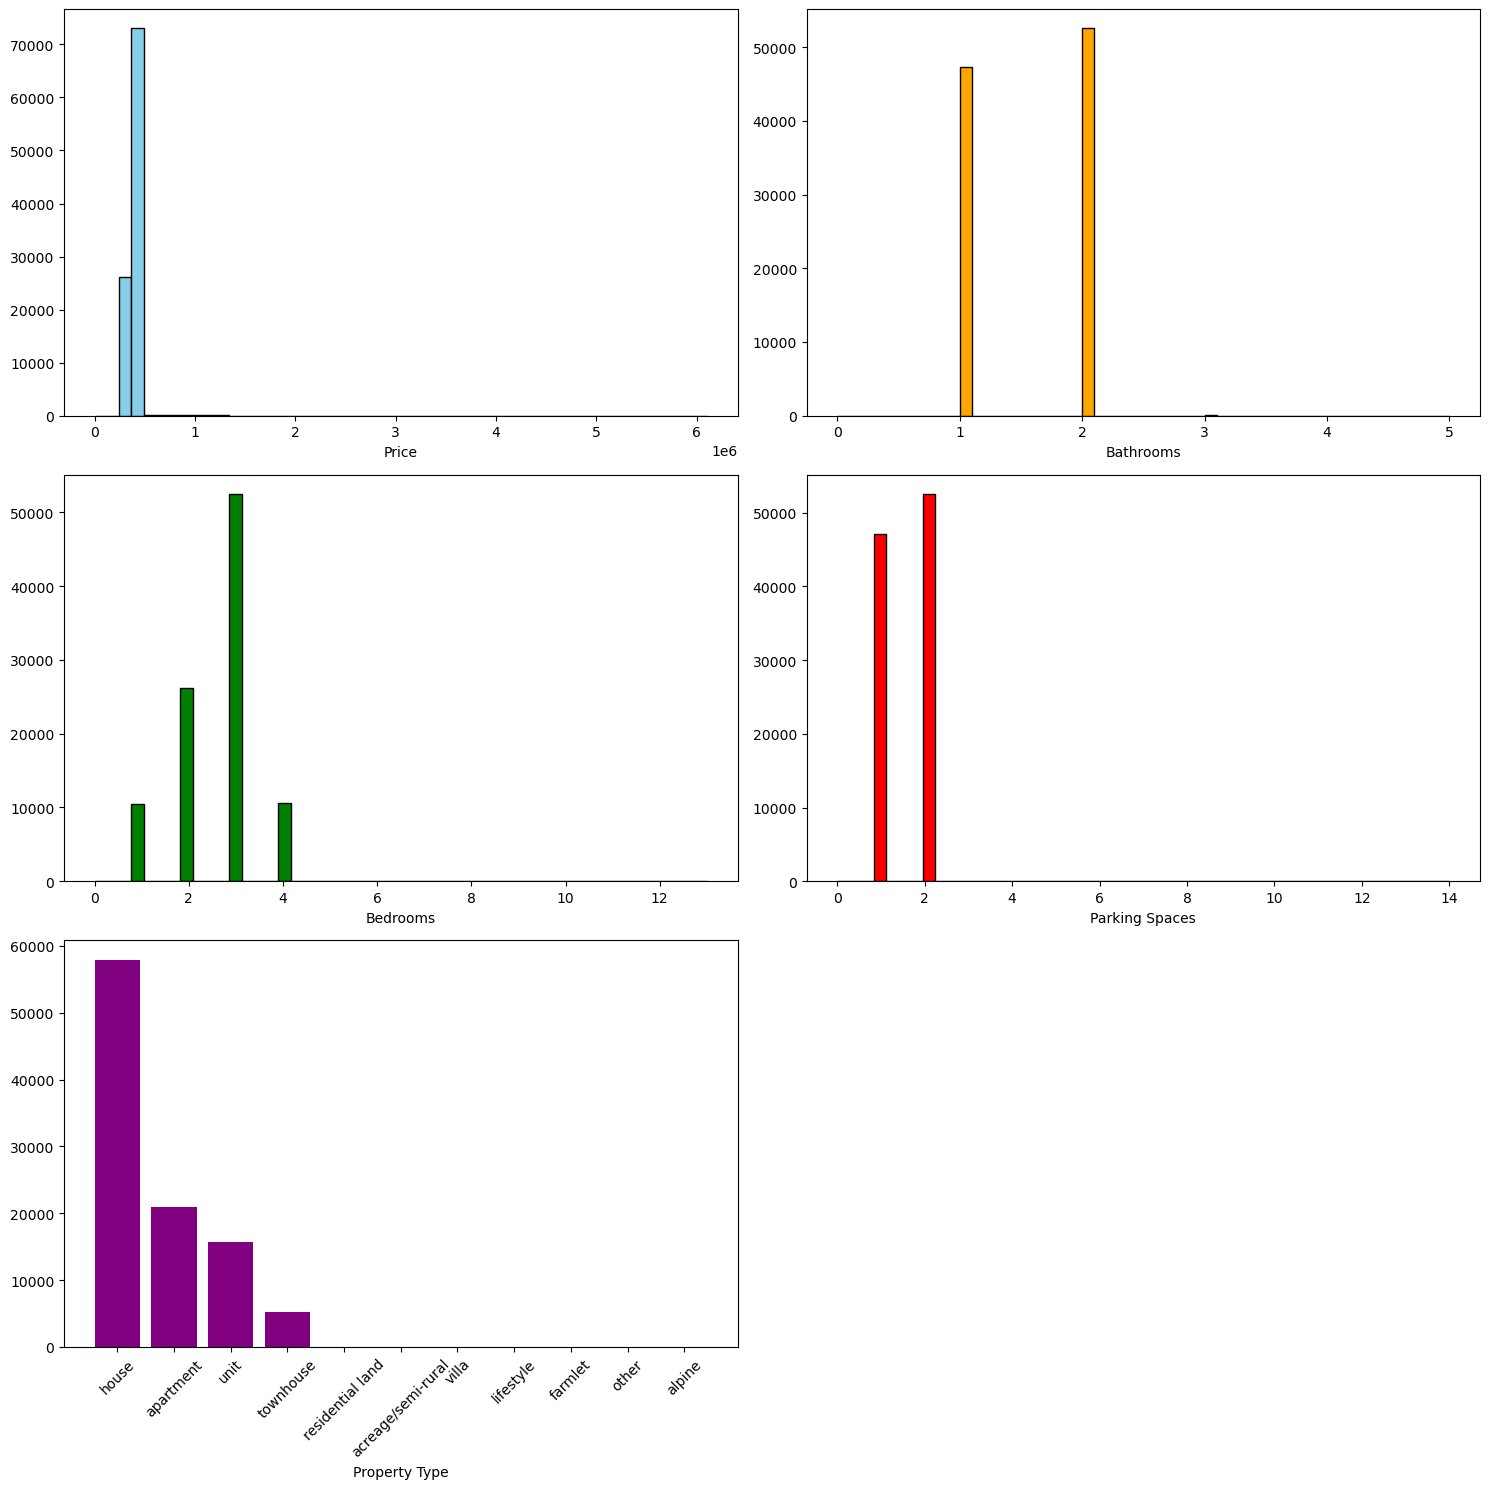

In [13]:
def visualization(df):
    fig, ax = plt.subplots(3, 2, figsize=(15, 15)) 

    ax[0, 0].hist(df['price'], color='skyblue', edgecolor='black', bins=50)
    ax[0, 0].set_xlabel('Price')

    ax[0, 1].hist(df['bathrooms'], color='orange', edgecolor='black', bins=50)
    ax[0, 1].set_xlabel('Bathrooms')

    ax[1, 0].hist(df['bedrooms'], color='green', edgecolor='black', bins=50)
    ax[1, 0].set_xlabel('Bedrooms')

    ax[1, 1].hist(df['parkingSpaces'], color='red', edgecolor='black', bins=50)
    ax[1, 1].set_xlabel('Parking Spaces')

    prop_type_count = df['propertyType'].value_counts()
    ax[2, 0].bar(prop_type_count.index, prop_type_count.values, color='purple')
    ax[2, 0].set_xlabel('Property Type')
    ax[2, 0].tick_params(axis='x', rotation=45)

    ax[2, 1].axis('off')

    plt.tight_layout()
    plt.show()

visualization(df)


# 6. Feature Selection

## Correlation matrix with sns Heatmap

C:\Users\Jaafar\AppData\Local\Temp\ipykernel_13172\1123446043.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


<Axes: >

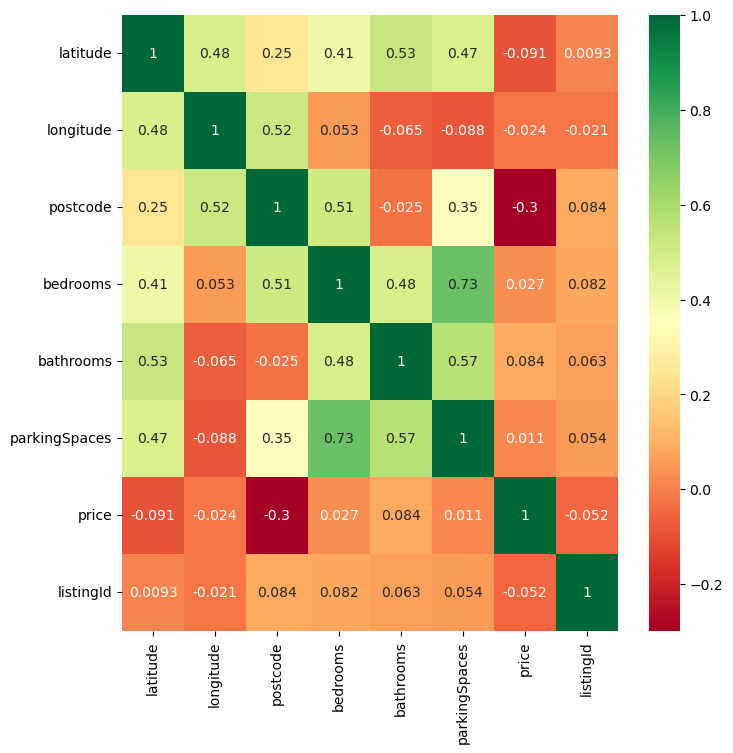

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

## 7. Encoding categorical features (propertyType)

In [15]:
dummies= pd.get_dummies(df['propertyType'])
df= pd.concat([df,dummies],axis=1)

## 8. Drop the unncecessary features

In [16]:
df.drop(['streetAddress','postcode', 'suburb', 'region', 'listingId', 'title', 'dateSold', 'modifiedDate','propertyType'],axis=1,inplace=True)

In [17]:
df.head()

,latitude,longitude,bedrooms,bathrooms,parkingSpaces,price,acreage/semi-rural,alpine,apartment,farmlet,house,lifestyle,other,residential land,townhouse,unit,villa
0,-38.276067,144.485488,3,2,2,1255000.0,0,0,0,0,1,0,0,0,0,0,0
1,-38.238159,144.545576,4,2,2,725000.0,0,0,0,0,1,0,0,0,0,0,0
2,-37.638387,144.922701,4,2,2,670000.0,0,0,0,0,1,0,0,0,0,0,0
4,-38.129071,144.323640,3,1,2,520000.0,0,0,0,0,1,0,0,0,0,0,0
5,-38.661799,143.858154,3,2,3,515000.0,0,0,0,0,1,0,0,0,0,0,0


## 9. Import Libraries for Data Modeling

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score)

In [19]:
#Independent variable
X= df.drop('price',axis=1)

In [20]:
#Dependent variable
Y= df['price']

In [21]:
#Split the dataset into train and test data
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=0)

In [22]:
#Train the model
model = RandomForestRegressor(criterion='squared_error',n_estimators=600, n_jobs=-1, max_features='sqrt', random_state=0)
model.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=600, n_jobs=-1,
                      random_state=0)

In [23]:
#Check the accuracy score of model
model.score(x_test,y_test)

0.8584931259192788

In [24]:
y_pred = model.predict(x_test)

In [25]:
#mean squared error
mean_squared_error(y_test, y_pred)

712195317.2310356

In [26]:
#Predict the price
model.predict([[-38.238159,144.545576,4,2,2,0,0,0,0,1,0,0,0,0,0,0]])

C:\Users\Jaafar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([699530.])

# 10. Save the model

In [27]:
import pickle

In [28]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

# 11. Save the final dataset

In [36]:
df.to_csv("house_prices.csv", index=False)

# Apply GridSearch for hyper parameter tuning

--> I used Grid Search to find the best parameters for the ml model.

In [30]:
# from sklearn.model_selection import GridSearchCV

In [31]:
# Set the parameters
# parameters = {'n_estimators': [300, 400, 500, 600, 700, 800], 'max_features': ['auto', 'sqrt', 'log2']}

In [32]:
# grid = GridSearchCV(estimator=RandomForestRegressor(criterion='mse', random_state=0, n_jobs=-1), 
                            # param_grid=parameters, scoring='r2',
                            # n_jobs=-1, cv=8)

In [33]:
# grid.fit(x_train, y_train)

In [34]:
# Print the best parameters found
# print(grid_search.best_params_)

The End!